In [19]:
import matplotlib.image as mpimg
import pprint
import time
from copy import copy
from numpy import array, zeros, float, dot
from random import randint
import math
import numpy as np
import scipy
import sys
from scipy import linalg
import networkx as nx
import matplotlib.pyplot as plt


In [20]:
def gauss_jordan(A, b):
    """
    Returns the vector x such that Ax=b.

    A is assumed to be an n by n matrix and b an n-element vector.
    """
    n, m = A.shape
    # should put in some checks of our assumptions, e.g. n == m
    C = zeros((n, m+1), float)
    C[:, 0:n], C[:, n] = A, b

    for j in range(n):
        # First, do partial pivoting.
        p = j  # the current diagonal element is pivot by default
        # look for alternate pivot by searching for largest element in column
        for i in range(j+1, n):
            if abs(C[i, j]) > abs(C[p, j]):
                p = i
        if abs(C[p, j]) < 1.0e-16:
            print("matrix is (likely) singular")
            return b
        # swap rows to get largest magnitude element on the diagonal
        C[p, :], C[j, :] = copy(C[j, :]), copy(C[p, :])
        # Now, do scaling and elimination.
        pivot = C[j, j]
        C[j, :] = C[j, :] / pivot
        for i in range(n):
            if i == j:
                continue
            C[i, :] = C[i, :] - C[i, j]*C[j, :]
    I, x = C[:, 0:n], C[:, n]
    return x

In [43]:
def print_times(n):

    A = np.random.randint(0, 10, (n, n))
    R = np.random.randint(0, 50, n)
    for i in range(n):
        A[i][i] = randint(1, 3)

    start = time.time()
    M = gauss_jordan(A, R)
    end = time.time()

    start_numpy = time.time()
    M2 = np.linalg.solve(A, R)
    end_numpy = time.time()

    lst_time = time.time()
    M3 = np.linalg.lstsq(A, R, rcond=None)
    lst_end_time = time.time()

    scipy_start = time.time()
    linalg.solve(A, R)
    scipt_end = time.time()

    print(f"My own algorithm: {(end-start)*1000} ms")
    print(f"Numpy linalg.solve: {(end_numpy-start_numpy)*1000} ms")
    print(f"Numpy linalg lstsq: {(lst_end_time-lst_time)*1000} ms")
    print(f"Scipy linalg.solve: {(scipt_end-scipy_start)*1000} ms")

In [36]:
def show_results(n):
    A = np.random.randint(0, 10, (n, n))
    R = np.random.randint(0, 50, n)
    for i in range(n):
        A[i][i] = randint(1, 3)
    X = gauss_jordan(A,R)
    print("My algorithm",X)
    print("Numpy",np.linalg.solve(A,R))

In [37]:
show_results(15)

My algorithm [ 271.4181974  -149.71451982  -53.40305537  120.51536205  157.35185979
   34.9926568  -200.80742389  -91.53525439  128.32359923 -130.44977201
   -5.23743614   47.15166016   63.14311402    8.42541284 -166.0182707 ]
Numpy [ 271.4181974  -149.71451982  -53.40305537  120.51536205  157.35185979
   34.9926568  -200.80742389  -91.53525439  128.32359923 -130.44977201
   -5.23743614   47.15166016   63.14311402    8.42541284 -166.0182707 ]


In [44]:
print_times(100)

My own algorithm: 31.033992767333984 ms
Numpy linalg.solve: 0.0 ms
Numpy linalg lstsq: 1.9679069519042969 ms
Scipy linalg.solve: 0.0 ms


In [45]:
print_times(500)

My own algorithm: 884.0327262878418 ms
Numpy linalg.solve: 3.9701461791992188 ms
Numpy linalg lstsq: 23.032426834106445 ms
Scipy linalg.solve: 3.997325897216797 ms


In [46]:
print_times(1000)

My own algorithm: 4254.999876022339 ms
Numpy linalg.solve: 17.96746253967285 ms
Numpy linalg lstsq: 147.99761772155762 ms
Scipy linalg.solve: 25.00152587890625 ms


In [114]:
def LU_partial_decomposition(matrix):
    n, m = matrix.shape
    P = np.identity(n)
    L = np.identity(n)
    U = matrix.copy()
    PF = np.identity(n)
    LF = np.zeros((n, n))
    for k in range(0, n - 1):
        index = np.argmax(abs(U[k:, k]))
        index = index + k
        if index != k:
            P = np.identity(n)
            P[[index, k], k:n] = P[[k, index], k:n]
            U[[index, k], k:n] = U[[k, index], k:n]
            PF = np.dot(P, PF)
            LF = np.dot(P, LF)
        L = np.identity(n)
        for j in range(k+1, n):
            L[j, k] = -(U[j, k] / U[k, k])
            LF[j, k] = (U[j, k] / U[k, k])
        U = np.dot(L, U)
    np.fill_diagonal(LF, 1)
    return PF, LF, U

In [133]:
def prepare_tables(n):
    A = np.random.randint(0, 10, (n, n))
    R = np.random.randint(0, 50, n)
    for i in range(n):
        A[i][i] = randint(1, 3)
    return (A,R)

In [136]:
(X,Y) = prepare_tables(4)
P, L, U = LU_partial_decomposition(X)
print(L)
print(U)

[[ 1.          0.          0.          0.        ]
 [ 1.          1.          0.          0.        ]
 [ 0.          0.25        1.          0.        ]
 [ 1.         -0.75        0.11111111  1.        ]]
[[ 1.          4.          4.          6.        ]
 [ 0.          4.          5.         -3.        ]
 [ 0.          0.          6.75        2.75      ]
 [ 0.          0.          0.         -8.55555556]]


In [197]:
class Graph:
    def __init__(self):
        self.edges = []
        (self.s, self.t, self.E) = (0, 0, 0)
        self.G = None

    @staticmethod
    def split_line(line):
        [a, b, c] = line.split(" ")
        return (int(a), int(b), int(c))

    def handle_line(self, line):
        self.edges.append(Graph.split_line(line))

    def read_file(self,filename):
        with open(filename) as f:
            for line in f.readlines():
                self.handle_line(line)
        (self.s, self.t, self.E) = self.edges[-1]
        self.edges = self.edges[:-1]

    def draw(self, label):
        pos = nx.kamada_kawai_layout(self.G)
        plt.figure()
        nx.draw(self.G, pos, edge_color='black', width=1, linewidths=1,
                node_size=500, node_color='pink', alpha=0.8,
                labels={node: node for node in self.G.nodes()})
        labels = {}
        for i, (a, b, c) in enumerate(self.edges):
            labels[(a, b)] = label[i]

        nx.draw_networkx_edge_labels(
            self.G, pos, edge_labels=labels, font_color='red', font_size=9)
        plt.axis('off')
        plt.show()

    def calculate_graph(self, draw_mode=False):
        edges = [[a, b] for (a, b, c) in self.edges]
        self.G = nx.DiGraph(directed=True)
        self.G.add_edges_from(edges)
        labels = [c for (a, b, c) in self.edges]
        if draw_mode:
            self.draw(labels)

    def kirchoff(self):
        self.calculate_graph()
        nodes = []
        for (a, b, R) in self.edges:
            nodes.append(a)
            nodes.append(b)
        nodes = set(nodes)
        graph = np.zeros((len(self.edges)+1, len(self.edges)))
        result = np.zeros((len(self.edges)+1, 1))

        O = []
        for i in range(len(nodes)+1):
            new = []
            for k in range(len(nodes)+1):
                new.append(0)
            O.append(new)

        for i, (a, b, R) in enumerate(self.edges):
            graph[a][i] = 1
            graph[b][i] = -1
            O[a][b] = (R, i, 0)
            O[b][a] = (-R, i, 0)
            if(a == self.s and b == self.t):
                O[a][b] = (R, i, self.E)
                O[b][a] = (-R, i, -self.E)

        for i, cycle in enumerate(nx.simple_cycles(self.G)):
            ee = 0.0
            for j, a in enumerate(cycle):
                b = cycle[(j+1) % len(cycle)]
                op = O[a][b][0]
                index = O[a][b][1]
                ee += O[a][b][2]
                graph[len(nodes)+i][index] = op
            result[len(nodes)+i] = ee

        res = np.linalg.lstsq(graph, result)[0]
        self.draw([round(r[0], 5) for r in res])


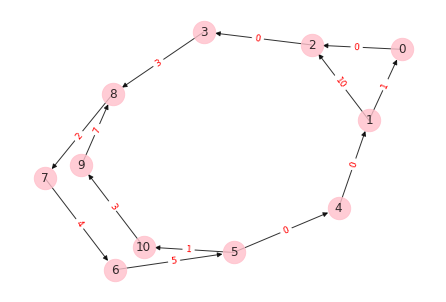

In [207]:
g = Graph()
g.read_file("graph.txt")
g.calculate_graph(draw_mode = True)

C:\Users\surja\Anaconda3\lib\site-packages\ipykernel_launcher.py:81: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


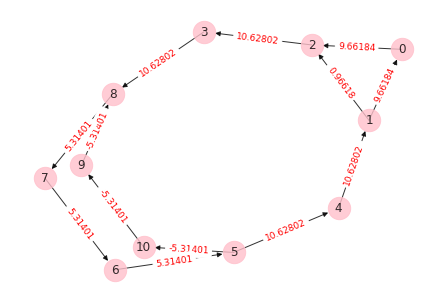

In [208]:
g.kirchoff()

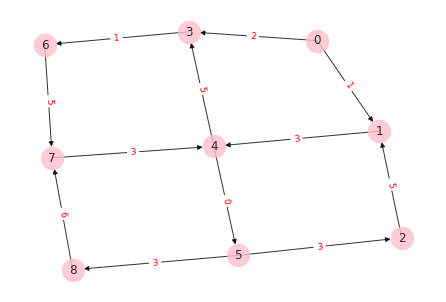

In [191]:
k = Graph()
k.read_file("graph2.txt")
k.calculate_graph(draw_mode = True)

C:\Users\surja\Anaconda3\lib\site-packages\ipykernel_launcher.py:81: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


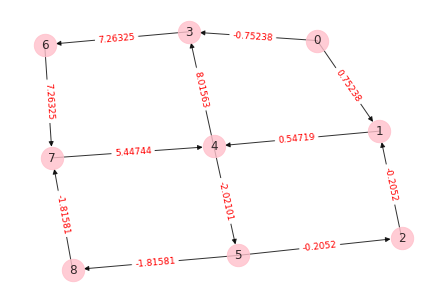

In [192]:
k.kirchoff()

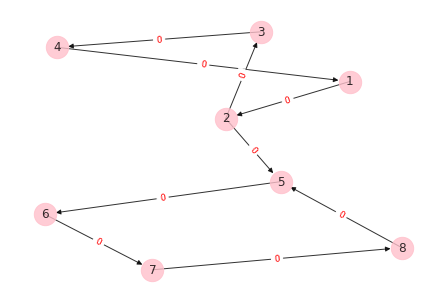

In [221]:
j = Graph()
j.read_file("graph3.txt")
j.calculate_graph(draw_mode = True)

C:\Users\surja\Anaconda3\lib\site-packages\ipykernel_launcher.py:81: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


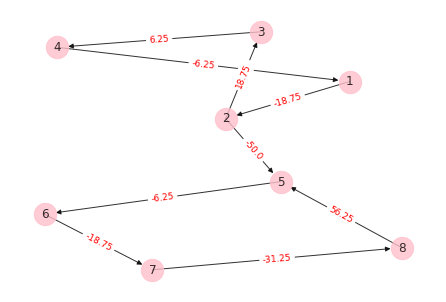

In [222]:
j.kirchoff()

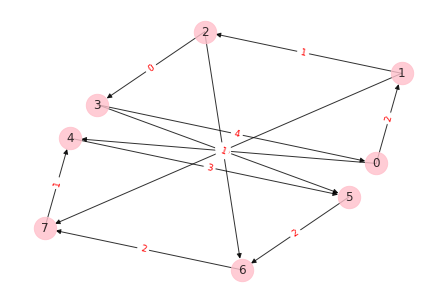

In [224]:
w = Graph()
w.read_file("graph4.txt")
w.calculate_graph(draw_mode = True)

C:\Users\surja\Anaconda3\lib\site-packages\ipykernel_launcher.py:81: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


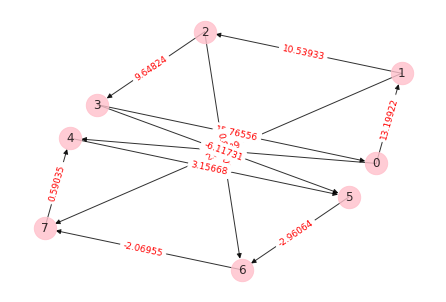

In [225]:
w.kirchoff()